# 1. Build a deep learning model to classify the mnist digits dataset with Batch Normalization.

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the unique classes in the dataset
unique_classes = set(train_labels)
print("Unique Classes in Training Set:", unique_classes)

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Print the number of classes after preprocessing
num_classes = train_labels.shape[1]
print("\nNumber of Classes in Training Set After Preprocessing:", num_classes)

Unique Classes in Training Set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Number of Classes in Training Set After Preprocessing: 10


In [5]:
# Build the model with Batch Normalization
model = models.Sequential()

# Convolutional layer with Batch Normalization and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())

# Convolutional layer with Batch Normalization and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Max-pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layer with Batch Normalization and ReLU activation
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())

# Output layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                        

In [6]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 125s 132ms/step - loss: 0.1011 - accuracy: 0.9710 - val_loss: 0.0606 - val_accuracy: 0.9806
Epoch 2/5
938/938 [==============================] - 120s 128ms/step - loss: 0.0363 - accuracy: 0.9894 - val_loss: 0.0400 - val_accuracy: 0.9878
Epoch 3/5
938/938 [==============================] - 114s 122ms/step - loss: 0.0239 - accuracy: 0.9928 - val_loss: 0.0519 - val_accuracy: 0.9858
Epoch 4/5
938/938 [==============================] - 102s 109ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0344 - val_accuracy: 0.9889
Epoch 5/5
938/938 [==============================] - 104s 111ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0421 - val_accuracy: 0.9887


In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 8s 25ms/step - loss: 0.0421 - accuracy: 0.9887
Test accuracy: 0.9886999726295471


313/313 [==============================] - 8s 25ms/step


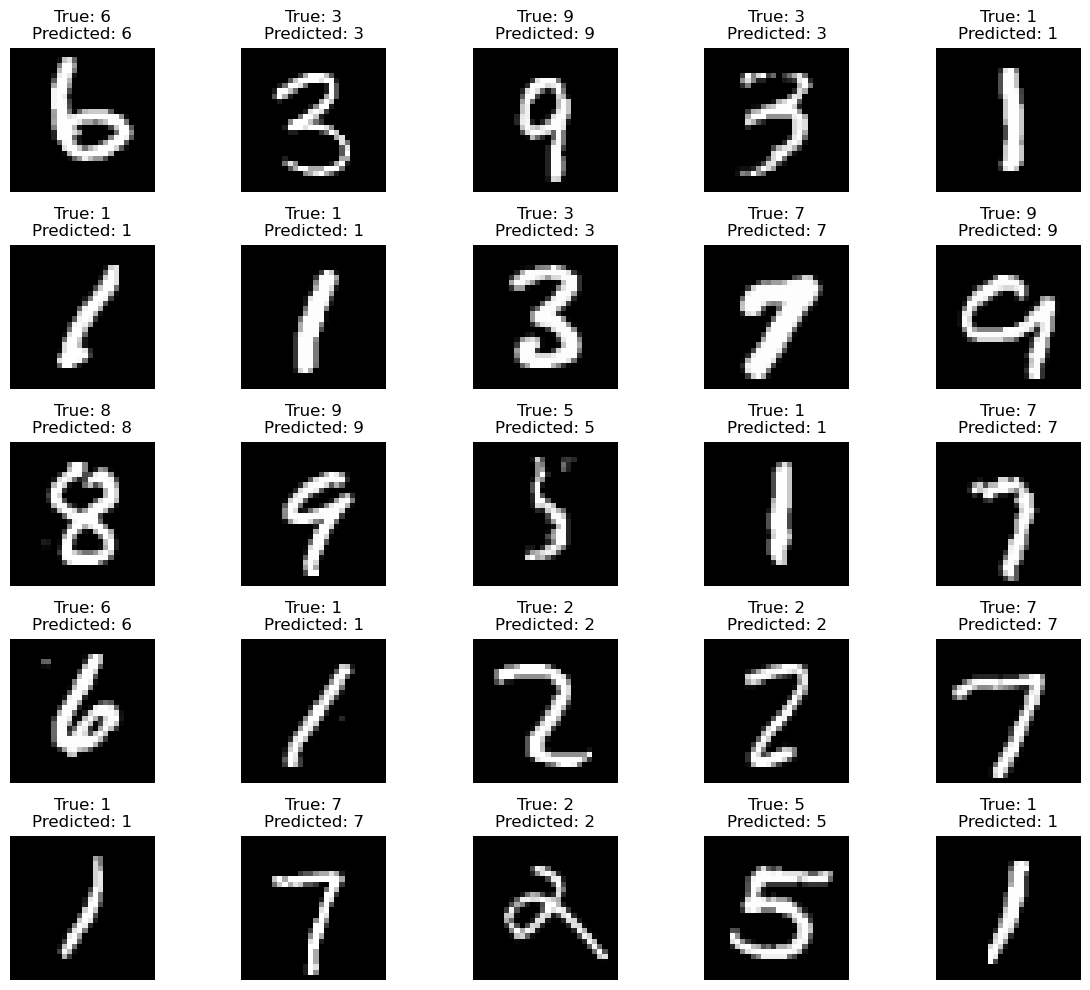

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = model.predict(test_images)

# Plot a random sample of test images along with their predicted and true labels
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
random_indices = np.random.choice(len(test_images), num_images, replace=False)

plt.figure(figsize=(12, 10))

for i, idx in enumerate(random_indices, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[idx])}\nPredicted: {np.argmax(predictions[idx])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

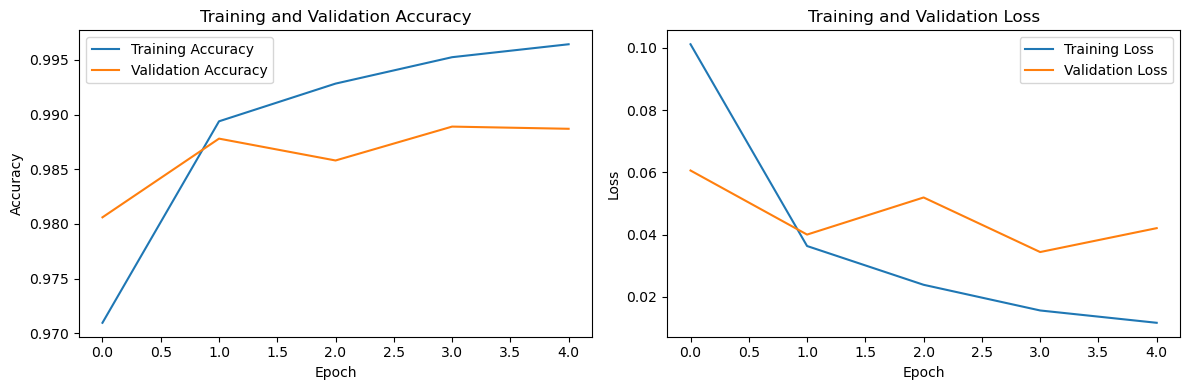

In [10]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Build a Feed Forward Neural Network for any problems with keras tuner.

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

C:\Users\Charanteja\AppData\Local\Temp\ipykernel_12036\3986964379.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [13]:
!pip install keras-tuner


  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
   --------- ------------------------------ 30.7/128.9 kB ? eta -:--:--
  

In [15]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to between 0 and 1

In [16]:
# Define the model-building function
def build_model(hp):
    model = keras.Sequential()

    # Flatten the input layer
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Add a dense layer with the number of units as a hyperparameter
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))

    # Add another dense layer with dropout for regularization
    model.add(layers.Dropout(0.5))

    # Output layer with 10 units (number of classes) and softmax activation
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model with a learning rate as a hyperparameter
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.summary()
    return model

In [17]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    directory='my_tuning_dir',  # Directory to store tuning results
    project_name='fashion_mnist_tuning'  # Name for the tuning project
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Search for the best hyperparameter configuration
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)

# Train the final model and capture the training history
history = final_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 10s]
val_accuracy: 0.8289999961853027

Best val_accuracy So Far: 0.8730999827384949
Total elapsed time: 00h 07m 49s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/

In [19]:
# Evaluate the final model
eval_result = final_model.evaluate(x_test, y_test)
print("Test loss:", eval_result[0])
print("Test accuracy:", eval_result[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.3283 - accuracy: 0.8810
Test loss: 0.32826146483421326
Test accuracy: 0.8809999823570251


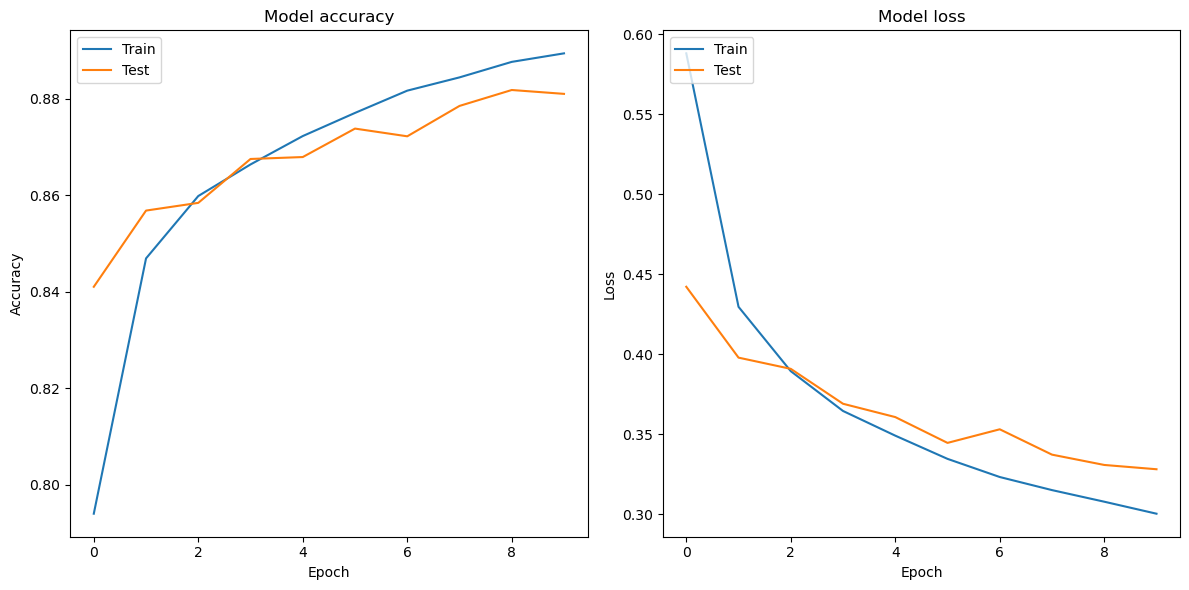

In [20]:
import matplotlib.pyplot as plt

# Plot the training history (accuracy and loss over epochs)
history_dict = history.history

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()